In [35]:
from portfolio import IBKRClient, run_loop
import time
import threading

app = IBKRClient()

# Connect to TWS or IB Gateway
app.connect("127.0.0.1", 4001, clientId=1)  # Use port 7496 for live accounts

# Start the API thread
api_thread = threading.Thread(target=run_loop, args=(app,), daemon=True)
api_thread.start()

# Allow time to connect and request data
time.sleep(2)

# Request portfolio data
app.reqAccountUpdates(True, "")  # "" requests updates for all accounts

# Allow time for data retrieval
time.sleep(10)

# Print portfolio data
print("\nPortfolio Summary:")
for item in app.portfolio_data:
    print(item)

# Disconnect
app.disconnect()


Next valid order ID: 1
Error -1: 2104 - Market data farm connection is OK:usfarm
Error -1: 2107 - HMDS data farm connection is inactive but should be available upon demand.ushmds
Error -1: 2158 - Sec-def data farm connection is OK:secdefil
Account Summary - NetLiquidation: 1951.42 GBP
Account Summary - NetLiquidation: 1951.42 GBP
Account Summary Received.
Account Summary Received.
Portfolio Update - NVT: 6.0 shares at 76.07159425 USD.
Portfolio Update - PSTG: 5.0 shares at 49.35281755 USD.
Portfolio Download Complete for Account: U13662170

Portfolio Summary:
{'Symbol': 'NVT', 'Position': 6.0, 'Market Price': 76.07159425, 'Market Value': 456.43, 'Average Cost': 72.84671465, 'Unrealized PNL': 19.35, 'Realized PNL': 0.0}
{'Symbol': 'PSTG', 'Position': 5.0, 'Market Price': 49.35281755, 'Market Value': 246.76, 'Average Cost': 48.960048, 'Unrealized PNL': 1.96, 'Realized PNL': 0.0}


In [36]:
app.account_summary

{'NetLiquidation': '1951.42'}

In [37]:
app.portfolio_data

[{'Symbol': 'NVT',
  'Position': 6.0,
  'Market Price': 76.07159425,
  'Market Value': 456.43,
  'Average Cost': 72.84671465,
  'Unrealized PNL': 19.35,
  'Realized PNL': 0.0},
 {'Symbol': 'PSTG',
  'Position': 5.0,
  'Market Price': 49.35281755,
  'Market Value': 246.76,
  'Average Cost': 48.960048,
  'Unrealized PNL': 1.96,
  'Realized PNL': 0.0}]

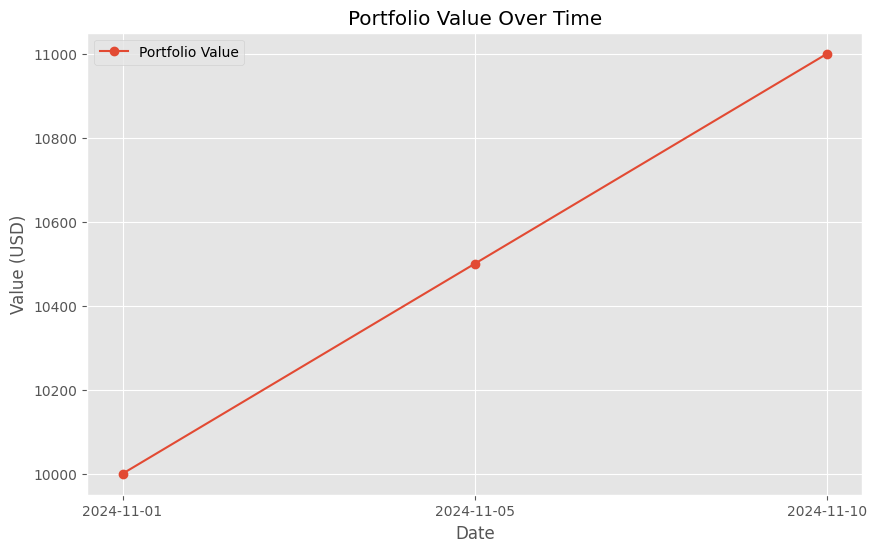

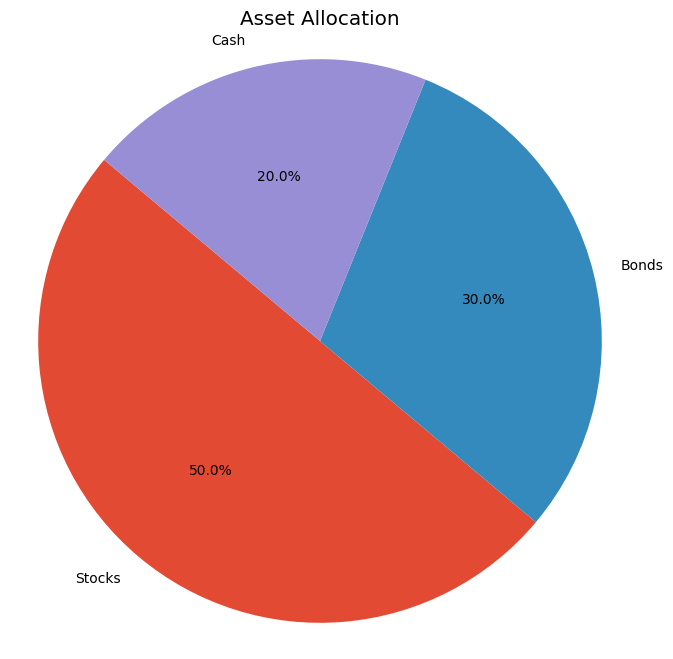

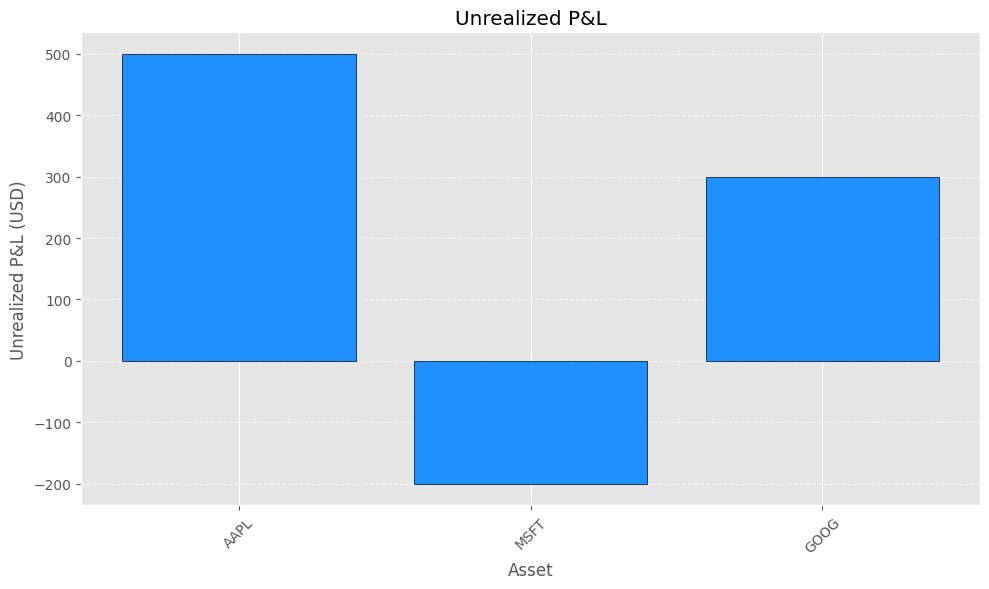

In [22]:
# Create the visualizer
visualizer = PortfolioVisualizer()

# Plot portfolio value
visualizer.plot_portfolio_value(portfolio_data)

# Plot asset allocation
visualizer.plot_asset_allocation(allocations)

# Plot unrealized P&L
visualizer.plot_unrealized_pnl(pnl_data)

# Interactive plot
visualizer.interactive_portfolio_value(portfolio_data)


In [ ]:
class Financials:
    def __init__(self, name, financials):
        self.name = name
        self.financials = financials

    class 

In [1]:
import yfinance as yf
from company_analysis import Company
import pandas as pd


# Fetch financials for SoundHound
ticker = "SOUN"
company = yf.Ticker(ticker)
market_price = company.history(period="1d")['Close'].iloc[-1]  # Fetch the latest closing price

# Fetch financial statements
balance_sheet = company.balance_sheet
income_statement = company.financials
cash_flow = company.cashflow

# transpose dataframes and concatenate laterally
df = pd.concat([balance_sheet.T, income_statement.T], axis=1)
df = pd.concat([df, cash_flow.T], axis=1)
df['Market Price Per Share'] = market_price

# initialise company class
SOUN = Company(ticker, df)



In [2]:
# calculate earnings per share: (net income - preferred dividends) / common shares outstanding

SOUN.ProfitabilityMetrics(SOUN.financials).eps()


2023-12-31   -0.400022
2022-12-31         NaN
2021-12-31         NaN
2020-12-31   -1.114717
dtype: object

In [3]:
# calculate return on interest: net income / average equity

SOUN.ProfitabilityMetrics(SOUN.financials).roe()

2023-12-31     7.876107
2022-12-31    10.335902
2021-12-31     7.043925
2020-12-31     6.589355
Name: Net Income, dtype: object

In [4]:
# calculate gross margin: (total revenue - cogs) / total revenue

SOUN.ProfitabilityMetrics(SOUN.financials).gross_margin()

2023-12-31    0.753515
2022-12-31    0.691638
2021-12-31    0.689343
2020-12-31    0.549589
dtype: object

In [5]:
# calculate net margin: net income / total revenue

SOUN.ProfitabilityMetrics(SOUN.financials).net_margin()

2023-12-31   -1.938766
2022-12-31   -3.749333
2021-12-31   -3.752418
2020-12-31    -5.71614
dtype: object

In [6]:
SOUN.LiquidityMetrics(SOUN.financials).current_ratio()

2023-12-31    4.687363
2022-12-31    0.458972
2021-12-31    0.313099
2020-12-31    1.996045
dtype: object

In [7]:
SOUN.LiquidityMetrics(SOUN.financials).quick_ratio() # inventory?

"Error: 'Inventory'"

In [8]:
SOUN.LiquidityMetrics(SOUN.financials).cash_ratio()

2023-12-31    3.932626
2022-12-31    0.239688
2021-12-31    0.246481
2020-12-31    1.781674
dtype: object

In [9]:
SOUN.SolvencyMetrics(SOUN.financials).debt_to_equity()

2023-12-31     3.20076
2022-12-31   -1.206728
2021-12-31   -0.213605
2020-12-31   -0.060216
dtype: object

In [10]:
SOUN.EfficiencyMetrics(SOUN.financials).inventory_turnover() # no inventory

"Error: 'Reconciled Cost of Revenue'"

In [11]:
SOUN.EfficiencyMetrics(SOUN.financials).asset_turnover()

2023-12-31    0.303549
2022-12-31    0.819486
2021-12-31    0.430807
2020-12-31    0.204551
dtype: object

In [12]:
SOUN.EfficiencyMetrics(SOUN.financials).receivables_turnover()

2023-12-31    4.386612
2022-12-31    2.976715
2021-12-31    2.026966
2020-12-31    1.244753
Name: Total Revenue, dtype: object

In [13]:
SOUN.ValuationMetrics(SOUN.financials).price_to_earnings()

2023-12-31   -16.099116
2022-12-31          NaN
2021-12-31          NaN
2020-12-31    -5.777249
dtype: object

In [14]:
SOUN.ValuationMetrics(SOUN.financials).price_to_book()

2023-12-31     52.41643
2022-12-31   -27.707534
2021-12-31    -1.261885
2020-12-31    -1.622023
dtype: object

In [15]:
SOUN.ValuationMetrics(SOUN.financials).ev_to_ebitda()

2023-12-31   -26.589652
2022-12-31    -10.69131
2021-12-31    -8.545434
2020-12-31    -7.045599
dtype: object

In [18]:
price_history = company.history(period="1y")

In [22]:
import numpy as np

price_history["Log Returns"] = np.log(price_history["Close"] / price_history["Close"].shift(1))


In [30]:
price_history["Realized Volatility"] = price_history["Log Returns"].rolling(window=21).std() * np.sqrt(252)  # 21-day window (1 month)


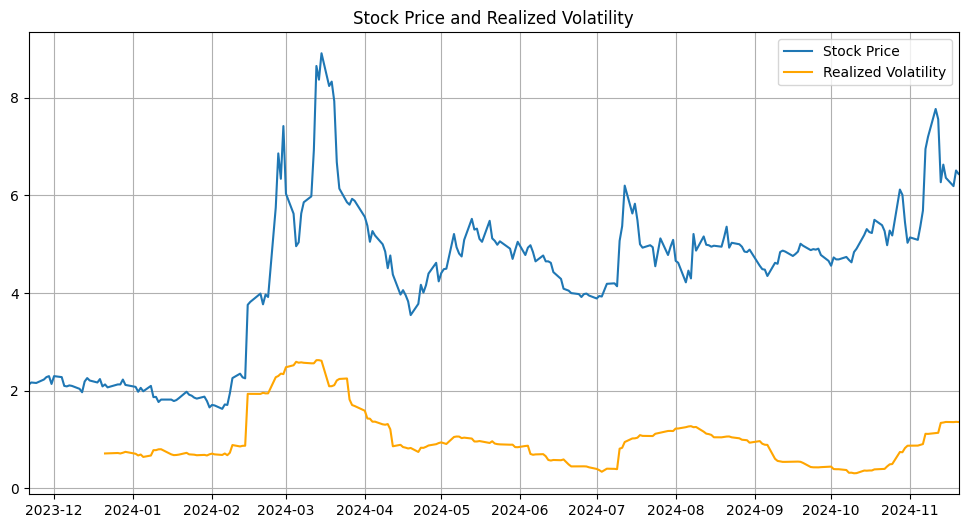

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(price_history.index, price_history["Close"], label="Stock Price")
plt.plot(price_history.index, price_history["Realized Volatility"], label="Realized Volatility", color="orange")
plt.title("Stock Price and Realized Volatility")
plt.legend()
plt.grid()
plt.xlim(left=price_history.index[0], right=price_history.index[-1])
plt.show()